In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/HomeSaleData.csv", sep=";")

In [3]:
data

,District,Neighborhood,Price,Adrtisement Date,m² (Gross),m² (Net),Number of rooms,Building Age,Floor location,Number of floors,...,Top floor,Garage / Shop Top,Entrance floor,Floor Duplex,Private Entry,Rerse Duplex,Triplex,Ground floor,Roof Duplex,Pick Up Data Time
0,Tuzla,Aydınlı Mh.,165.000 TL,04.01.2020,50,40.0,1+1,5-10 between,5,13,...,0,0,0,0,0,0,0,0,0,01.08.2020
1,Fatih,Katip Kasım Mh.,207.000 TL,06.01.2020,42,42.0,1+1,31 and more than,Ground floor,3,...,0,0,0,0,0,0,0,0,0,01.10.2020
2,Çekmeköy,Çatalmeşe Mh.,153.000 TL,31.12.2019,55,45.0,1+1,1,Kot 1,7,...,0,0,0,0,0,0,0,0,0,01.10.2020
3,Çekmeköy,Mehmet Akif Ersoy Mah.,205.000 TL,29.12.2019,62,46.0,1+1,0,High entrance,5,...,0,0,0,0,0,0,0,0,0,01.10.2020
4,Küçükçekmece,Halkalı Merkez Mh.,150.000 TL,01.01.2020,70,55.0,1+1,5-10 between,Garden Floor,4,...,0,0,0,0,0,0,0,0,0,01.07.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Sarıyer,Ayazağa Mh.,5.650.000 TL,02.01.2020,270,185.0,4+1,0,9,9,...,0,0,0,0,0,0,0,0,0,01.08.2020
34839,Bakırköy,Ataköy 2-5-6. Kısım Mh.,12.000.000 TL,03.01.2020,289,250.0,4.5+1,0,8,16,...,0,0,0,0,0,0,0,0,0,01.10.2020
34840,Sarıyer,Maslak Mah.,2.700.000 TL,03.01.2020,311,310.0,3+1,1,14,16,...,1,1,1,1,1,1,1,1,1,01.08.2020
34841,Fatih,İskenderpaşa Mh.,775.000 TL,28.12.2019,145,121.0,3+1,0,4,7,...,0,0,0,0,0,0,0,0,0,01.10.2020


In [4]:
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

m² (Net)    28
dtype: int64

In [5]:
data.shape

(34843, 179)

In [6]:
pd.set_option('max_info_columns', 2000)
pd.set_option('max_info_rows', 2000000)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34843 entries, 0 to 34842
Data columns (total 179 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    District                         34843 non-null  object 
 1    Neighborhood                     34843 non-null  object 
 2    Price                            34843 non-null  object 
 3    Adrtisement Date                 34843 non-null  object 
 4    m² (Gross)                       34843 non-null  int64  
 5    m² (Net)                         34815 non-null  float64
 6    Number of rooms                  34843 non-null  object 
 7    Building Age                     34843 non-null  object 
 8    Floor location                   34843 non-null  object 
 9    Number of floors                 34843 non-null  object 
 10   Heating                          34843 non-null  object 
 11   Number of bathrooms              34843 non-null  object 
 12   Ba

In [7]:
data.describe()

,m² (Gross),m² (Net),Front West,Front East,Front South,Front North,ADSL,Wood Joinery,Smart House,Alarm (Thief),...,Garden,Top floor,Garage / Shop Top,Entrance floor,Floor Duplex,Private Entry,Rerse Duplex,Triplex,Ground floor,Roof Duplex
count,34843.000000,34815.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,...,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000,34843.000000
mean,127.141779,110.681258,0.268002,0.330052,0.554286,0.147289,0.329076,0.104985,0.064834,0.080045,...,0.061791,0.066412,0.011365,0.050426,0.028930,0.022185,0.023965,0.013173,0.019889,0.098700
std,79.674975,48.697697,0.442925,0.470238,0.497051,0.354399,0.469884,0.306539,0.246236,0.271366,...,0.240780,0.249005,0.106002,0.218826,0.167612,0.147288,0.152941,0.114018,0.139622,0.298263
min,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,145.000000,130.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9140.000000,917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
for col in data:
    print(f"{col} \n", data[col].unique())
    print()

District 
 ['Tuzla' 'Fatih' 'Çekmeköy' 'Küçükçekmece' 'Ümraniye' 'Silivri' 'Esenyurt'
 'Arnavutköy' 'Avcılar' 'Eyüpsultan' 'Kağıthane' 'Ataşehir' 'Beylikdüzü'
 'Sancaktepe' 'Sultangazi' 'Üsküdar' 'Beşiktaş' 'Bayrampaşa' 'Beyoğlu'
 'Çatalca' 'Sarıyer' 'Başakşehir' 'Şişli' 'Gaziosmanpaşa' 'Şile'
 'Sultanbeyli' 'Esenler' 'Beykoz' 'Kartal' 'Zeytinburnu' 'Bakırköy'
 'Adalar' 'Bahçelievler' 'Güngören' 'Maltepe' 'Pendik' 'Kadıköy'
 'Büyükçekmece' 'Bağcılar']

Neighborhood 
 ['Aydınlı Mh.' 'Katip Kasım Mh.' 'Çatalmeşe Mh.' 'Mehmet Akif Ersoy Mah.'
 'Halkalı Merkez Mh.' 'Çakmak Mh.' 'Yeni Mah.' 'Yeşilkent Mh.'
 'Turgut Özal Mh.' 'Anadolu Mah.' 'Cihangir Mah.' 'Akşemsettin Mh.'
 'Gültepe Mh.' 'Hırka-i Şerif Mh.' 'Kemal Paşa Mh.' 'Esatpaşa Mh.'
 'Sultan Selim Mh.' 'Yakuplu Mah.' 'Sarıgazi Mh.' 'İsmetpaşa Mh.'
 'Aydıntepe Mh.' 'Kısıklı Mh.' 'Dikilitaş Mh.' 'İsmet Paşa Mh.'
 'Sururi Mehmet Efendi Mah.' 'Ferhatpaşa Mh.' 'Telsizler Mah.'
 'Yayla Mah.' 'İçerenköy Mh.' 'Yenidoğan Mh.' 'Fetihtepe Mah.'


# Data Cleaning & Feature Engineering

## District

In [9]:
data["District"] = data["District"].str.strip().str.title()

In [10]:
data["District"].unique()

array(['Tuzla', 'Fatih', 'Çekmeköy', 'Küçükçekmece', 'Ümraniye',
       'Silivri', 'Esenyurt', 'Arnavutköy', 'Avcılar', 'Eyüpsultan',
       'Kağıthane', 'Ataşehir', 'Beylikdüzü', 'Sancaktepe', 'Sultangazi',
       'Üsküdar', 'Beşiktaş', 'Bayrampaşa', 'Beyoğlu', 'Çatalca',
       'Sarıyer', 'Başakşehir', 'Şişli', 'Gaziosmanpaşa', 'Şile',
       'Sultanbeyli', 'Esenler', 'Beykoz', 'Kartal', 'Zeytinburnu',
       'Bakırköy', 'Adalar', 'Bahçelievler', 'Güngören', 'Maltepe',
       'Pendik', 'Kadıköy', 'Büyükçekmece', 'Bağcılar'], dtype=object)

## Neighborhood

In [11]:
data["Neighborhood"] = data["Neighborhood"].str.strip().str.title()
data['Neighborhood'] = data['Neighborhood'].str.replace(r'Mh\.', 'Mah.', regex=True)

In [12]:
data["Neighborhood"].unique()

array(['Aydınlı Mah.', 'Katip Kasım Mah.', 'Çatalmeşe Mah.',
       'Mehmet Akif Ersoy Mah.', 'Halkalı Merkez Mah.', 'Çakmak Mah.',
       'Yeni Mah.', 'Yeşilkent Mah.', 'Turgut Özal Mah.', 'Anadolu Mah.',
       'Cihangir Mah.', 'Akşemsettin Mah.', 'Gültepe Mah.',
       'Hırka-I Şerif Mah.', 'Kemal Paşa Mah.', 'Esatpaşa Mah.',
       'Sultan Selim Mah.', 'Yakuplu Mah.', 'Sarıgazi Mah.',
       'İsmetpaşa Mah.', 'Aydıntepe Mah.', 'Kısıklı Mah.',
       'Dikilitaş Mah.', 'İsmet Paşa Mah.', 'Sururi Mehmet Efendi Mah.',
       'Ferhatpaşa Mah.', 'Telsizler Mah.', 'Yayla Mah.',
       'İçerenköy Mah.', 'Yenidoğan Mah.', 'Fetihtepe Mah.',
       'Sultaniye Mah.', 'Pınar Mah.', 'Kayabaşı Mah.', 'Madenler Mah.',
       'Fatih Silivri Mah.', 'İslambey Mah.', 'Aziz Mahmut Hüdayi Mah.',
       'Eskişehir Mah.', 'Karlıtepe Mah.', 'Emirgan Mah.',
       'Parseller Mah.', 'Balibey Mah.', 'Akçaburgaz Mah.',
       'Mimar Sinan Mah.', 'Barbaros Hayrettin Paşa Mah.',
       'Esentepe Mah.', 'Silivrik

## Price

In [13]:
data["Price"] = data["Price"].str.replace(r'\s*TL', '', regex=True)
data["Price"] = data["Price"].str.replace(r'\.', '', regex=True)
data["Price"] = data["Price"].str.replace(',', '.', regex=True)
data["Price"] = data["Price"].astype(float)

data.rename(columns={'Price': 'Price (TL)'}, inplace=True)

In [14]:
data['Price (TL)'].unique().dtype

dtype('float64')

## Adrtisement Date

In [15]:
data.drop(columns=["Adrtisement Date"], inplace=True)

## m² (Gross)

In [16]:
data["m² (Gross)"] = pd.to_numeric(data["m² (Gross)"], errors="coerce")

In [17]:
data["m² (Gross)"].unique()

array([  50,   42,   55,   62,   70,   65,   75,   64,   69,   72,   95,
         67,   80,   90,   85,   96,   82,  100,   92,   83,  102,   87,
         86,  105,  110,  115,  116,  130,  120,  126,  117,  125,  135,
        140,  134,  145,  138,  155,  180,  200,  220,  217,   66,   99,
        127,  187,   77,   97,  210,  190,   68,  150,   60,   78,  245,
        143,  160,  129,  152,   43,   89,   61,  101,  165,   20,   40,
         45,   54,   58,   71,  103,   74,   84,   88,  114,   98,  123,
        106,  133,  124,  139,  118,  121,  151,  112,  148,  128,  154,
        174,  164,  172,  146,  137,  173,  170,  177,  162,  186,  169,
        208,  232,  156,  240,  159,  175,  192,  183,  185,  196,  184,
        189,  230,  225,  235,  246,  320,  285,  260,  209,  215,  250,
        265,  254,  300,  280,  270,  290,  330,  389,  500,  108,   37,
         32,   48,   30,   56,   35,   57,   38,   59,   52,   51,   49,
         76,   53,   73,   63,   93,   81,  132,   

In [18]:
data["m² (Gross)"].dtype

dtype('int64')

In [19]:
data[data["m² (Gross)"] >= 1000]

,District,Neighborhood,Price (TL),m² (Gross),m² (Net),Number of rooms,Building Age,Floor location,Number of floors,Heating,...,Top floor,Garage / Shop Top,Entrance floor,Floor Duplex,Private Entry,Rerse Duplex,Triplex,Ground floor,Roof Duplex,Pick Up Data Time
2867,Esenler,Nine Hatun Mah.,180000.0,1100,100.0,3+1,21-25 between,6,6,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,0,01.08.2020
3318,Silivri,Yeni Mah.,329000.0,1300,115.0,3+1,5-10 between,High entrance,6,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,0,01.08.2020
4012,Zeytinburnu,Nuripaşa Mah.,450000.0,1700,160.0,2+2,21-25 between,4,5,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,0,01.07.2020
5577,Arnavutköy,Anadolu Mah.,251000.0,1000,95.0,2+1,0,1,5,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,0,01.10.2020
5881,Esenyurt,Gökevler Mah.,330000.0,1200,110.0,2+1,0,1,7,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,0,01.08.2020
8716,Ataşehir,Kayışdağı Mah.,375000.0,1000,80.0,2+1,0,9,11,Natural Gas (Combi),...,1,0,0,0,0,0,0,0,0,01.10.2020
10886,Pendik,Kaynarca Mah.,570000.0,2000,175.0,4+2,11-15 between,5,6,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,1,01.08.2020
12503,Büyükçekmece,Pınartepe Mah.,1380000.0,9140,370.0,5+1,4,Kot 4,4,Center (Share Meter),...,0,0,0,1,0,1,0,0,0,01.10.2020
13962,Kadıköy,Osmanağa Mah.,500000.0,1100,110.0,3+1,31 and more than,2,5,Natural Gas (Combi),...,0,0,0,0,0,0,0,0,0,01.07.2020
20813,Beşiktaş,Akat Mah.,22222.0,2222,22.0,1.5+1,3,Kot 3,2,Naturel gas Stovesı,...,0,0,0,0,0,1,0,0,0,01.10.2020


In [20]:
data["Neighborhood"].value_counts().get("Akat Mah.", 0)

np.int64(49)

In [21]:
data.loc[[20813]]

,District,Neighborhood,Price (TL),m² (Gross),m² (Net),Number of rooms,Building Age,Floor location,Number of floors,Heating,...,Top floor,Garage / Shop Top,Entrance floor,Floor Duplex,Private Entry,Rerse Duplex,Triplex,Ground floor,Roof Duplex,Pick Up Data Time
20813,Beşiktaş,Akat Mah.,22222.0,2222,22.0,1.5+1,3,Kot 3,2,Naturel gas Stovesı,...,0,0,0,0,0,1,0,0,0,01.10.2020


In [22]:
data = data.drop(index=20813)

In [23]:
"""data["m² (Gross)"] = data["m² (Gross)"].astype(float)
mask = data["m² (Gross)"] >= 1000
data.loc[mask, "m² (Gross)"] = data.loc[mask, "m² (Gross)"] / 10

print(data.loc[mask, ["m² (Gross)", "m² (Net)", "Price (TL)"]])"""


'data["m² (Gross)"] = data["m² (Gross)"].astype(float)\nmask = data["m² (Gross)"] >= 1000\ndata.loc[mask, "m² (Gross)"] = data.loc[mask, "m² (Gross)"] / 10\n\nprint(data.loc[mask, ["m² (Gross)", "m² (Net)", "Price (TL)"]])'

In [24]:
data.rename(columns={"m² (Gross)": "m2 (Gross)"}, inplace=True)

## m² (Net)

In [25]:
nan_indexes = data[data["m² (Net)"].isna()].index
print(nan_indexes)

Index([   81,   770,  4386,  4387,  4388,  4389,  4390,  4391,  4392,  4393,
        6575,  8107, 10986, 13260, 14511, 15698, 16044, 19274, 21685, 22158,
       23648, 26769, 27071, 27779, 30300, 30739, 34000, 34099],
      dtype='int64')


In [26]:
data["m² (Net)"] = data.groupby(["Neighborhood", "Number of rooms", "Building Age"])["m² (Net)"] \
                       .transform(lambda x: x.fillna(x.median()))

C:\IstanbulHousePricePrediction\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\IstanbulHousePricePrediction\.venv\Lib\site-packages\numpy\lib

In [27]:
nan_indexes = data[data['m² (Net)'].isna()].index
print(nan_indexes)

Index([770, 4391, 6575, 16044, 27071, 27779, 30739, 34000, 34099], dtype='int64')


In [28]:
# If there is still NaN, fill the entire dataset with the median
data["m² (Net)"] = data["m² (Net)"].fillna(data["m² (Net)"].median())

In [29]:
data[data["m² (Net)"].isna()].index

Index([], dtype='int64')

In [30]:
data.rename(columns={"m² (Net)": "m2 (Net)"}, inplace=True)

## Number of rooms

In [31]:
data["Number of rooms"] = data["Number of rooms"].replace("10 and more than", "10+")

## Building Age

In [32]:
data["Building Age"] = data["Building Age"].replace({
    "31  and more than": "31+",
    "5-10 between": "5-10",
    "11-15 between": "11-15",
    "16-20 between": "16-20",
    "21-25 between": "21-25",
    "26-30 between": "26-30"
})

## Floor location

In [33]:
floor_mapping = {
    "Ground floor": 0,
    "Entrance floor": 0,
    "High entrance": 0,
    "Garden Floor": 0,
    "Basement": -1,
    "Kot 1": -1,
    "Kot 2": -2,
    "Kot 3": -3,
    "Kot 4": -4,
    "Penthouse": 99,
    "Villa type": 100,
    "Private": 101
}

data["Floor location"] = data["Floor location"].replace("30 and more than", 30)
data["Floor location"] = data["Floor location"].replace(floor_mapping)
data["Floor location"] = pd.to_numeric(data["Floor location"], errors="ignore")

C:\Users\Muham\AppData\Local\Temp\ipykernel_1536\2589974882.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data["Floor location"] = pd.to_numeric(data["Floor location"], errors="ignore")


## Number of floors

In [34]:
data["Number of floors"] = data["Number of floors"].replace("30  and more than", "30")
data["Number of floors"] = data["Number of floors"].astype(int)

## Heating

In [35]:
data["Heating"].value_counts()

Heating
Natural Gas (Combi)     26715
Center (Share Meter)     5304
Central system           1388
Underfloor heating        437
Naturel gas Stovesı       389
Floor Heating             195
Absent                    158
Stove                     113
Climate                    51
Fancoil Ünitesi            31
VRV                        28
Jeotermal                  15
Fancoil ünitesi            10
Fireplace                   5
Solar energy                2
Heat pump                   1
Name: count, dtype: int64

In [36]:
data["Heating"] = data["Heating"].replace({
    "Fancoil ünitesi": "Fancoil Ünitesi",
    "Naturel gas Stovesı": "Natural Gas (Combi)",
    "Floor Heating": "Underfloor heating",
    "Center (Share Meter)": "Central (Share Meter)"
})

In [37]:
data["Heating"].value_counts()

Heating
Natural Gas (Combi)      27104
Central (Share Meter)     5304
Central system            1388
Underfloor heating         632
Absent                     158
Stove                      113
Climate                     51
Fancoil Ünitesi             41
VRV                         28
Jeotermal                   15
Fireplace                    5
Solar energy                 2
Heat pump                    1
Name: count, dtype: int64

In [38]:
data["Heating"] = data["Heating"].replace({
    "Natural Gas (Combi)": "Natural Gas",
    "Central (Share Meter)": "Central Heating",
    "Central system": "Central Heating",
    "Underfloor heating": "Other Heating",
    "Fancoil Ünitesi": "Other Heating",
    "VRV": "Other Heating",
    "Jeotermal": "Other Heating",
    "Fireplace": "Other Heating",
    "Solar energy": "Other Heating",
    "Heat pump": "Other Heating",
    "Stove": "Stove",
    "Climate": "Climate",
    "Absent": "Absent"
})

In [39]:
data["Heating"].value_counts()

Heating
Natural Gas        27104
Central Heating     6692
Other Heating        724
Absent               158
Stove                113
Climate               51
Name: count, dtype: int64

## Number of bathrooms

In [40]:
data["Number of bathrooms"] = data["Number of bathrooms"].replace("6 and more than", "7")
data["Number of bathrooms"] = data["Number of bathrooms"].replace("Absent", "0")
data["Number of bathrooms"] = data["Number of bathrooms"].astype(int)

## Furnished

In [41]:
data["Furnished"].value_counts(normalize=True)

Furnished
No         0.937288
Yes        0.039177
Unknown    0.023535
Name: proportion, dtype: float64

In [42]:
data = data.drop("Furnished", axis=1)

## Available for Loan

In [43]:
data["Available for Loan"] = data["Available for Loan"].astype("category")

## From who

In [44]:
data["From who"] = data["From who"].astype("category")

## Swap

In [45]:
data = data.drop("Swap", axis=1)

## Front -West -East -South -North

In [46]:
directions = ['Front West', 'Front East', 'Front South', 'Front North']

def combine_directions(row):
    dirs = []
    if row['Front West'] == 1:
        dirs.append('West')
    if row['Front East'] == 1:
        dirs.append('East')
    if row['Front South'] == 1:
        dirs.append('South')
    if row['Front North'] == 1:
        dirs.append('North')
    return '-'.join(dirs) if dirs else 'None'

data['Front_combined'] = data.apply(combine_directions, axis=1)

# South=1, West=0.5, East=0.5, North=0
def direction_score(row):
    score = 0
    score += 0.5 * row['Front West']
    score += 0.5 * row['Front East']
    score += 1.0 * row['Front South']
    score += 0.0 * row['Front North']
    return score

data['Front_score'] = data.apply(direction_score, axis=1)

In [47]:
data[['Front West','Front East','Front South','Front North','Front_combined','Front_score']].head(10000)

,Front West,Front East,Front South,Front North,Front_combined,Front_score
0,0,0,0,0,None,0.0
1,0,0,0,0,None,0.0
2,0,0,0,0,None,0.0
3,0,0,0,0,None,0.0
4,0,0,0,0,None,0.0
...,...,...,...,...,...,...
9995,0,0,0,0,None,0.0
9996,0,1,0,0,East,0.5
9997,0,0,0,0,None,0.0
9998,0,0,0,0,None,0.0


In [48]:
data["Front_combined"].value_counts()

Front_combined
None                     10167
South                     8077
East-South                3610
West-East-South           2241
West-South                2014
West-East-South-North     1815
East                      1401
West-East                 1215
West                       985
South-North                883
East-North                 503
West-North                 483
North                      462
East-South-North           401
West-East-North            314
West-South-North           271
Name: count, dtype: int64

## Internet

In [49]:
data["Internet"] = data[["ADSL", "Fiber Internet"]].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

## Security

In [50]:
data["Security"].value_counts()

Security
0    27225
1     7617
Name: count, dtype: int64

In [51]:
data["Alarm (Thief)"].value_counts()

Alarm (Thief)
0    32053
1     2789
Name: count, dtype: int64

In [52]:
data["Security_Alarm"] = data[["Security", "Alarm (Thief)"]].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

In [53]:
data["Security_Alarm"].value_counts()

Security_Alarm
0    26350
1     8492
Name: count, dtype: int64

## Smart House

In [54]:
data["Smart House"].value_counts()

Smart House
0    32583
1     2259
Name: count, dtype: int64

## Elevator

In [55]:
data["Elevator"].value_counts()

Elevator
0    19867
1    14975
Name: count, dtype: int64

## Balcony

In [56]:
## Balcony

In [57]:
data["Balcony.1"].value_counts()

Balcony.1
1    17924
0    16918
Name: count, dtype: int64

In [58]:
if "Balcony" in data.columns:
    data.drop(columns=["Balcony"], inplace=True)


In [59]:
data.rename(columns={"Balcony.1": "Balcony"}, inplace=True)

In [60]:
data["Balcony"].value_counts()

Balcony
1    17924
0    16918
Name: count, dtype: int64

## Car Park

In [61]:
# Closed Garage/Car Park/Parking Lot

In [62]:
columns = ["Closed Garage", "Car park", "Parking Lot"]

for col in columns:
    print(data[col].value_counts())

Closed Garage
0    26727
1     8115
Name: count, dtype: int64
Car park
0    22279
1    12563
Name: count, dtype: int64
Parking Lot
0    27323
1     7519
Name: count, dtype: int64


In [63]:
data["Car Park"] = data[["Closed Garage", "Car park", "Parking Lot"]].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

In [64]:
data["Car Park"].value_counts()

Car Park
0    19972
1    14870
Name: count, dtype: int64

## Laminate Floor

In [65]:
data["Laminate Floor"].value_counts()

Laminate Floor
0    21261
1    13581
Name: count, dtype: int64

## Luxury_Facilities(Swim, Sauna, Jacuzzi)

In [66]:
cols = ["Swimming Pool (Open)", "Swimming Pool (Indoor)", "Swimming pool", "Sauna", "Jacuzzi"]

data["Luxury_Facilities"] = data[cols].apply(
    lambda x: 1 if x.max() == 1 else 0, axis=1
)

In [67]:
data["Luxury_Facilities"].value_counts()

Luxury_Facilities
0    28832
1     6010
Name: count, dtype: int64

## Airport, Marmaray, Metro, Metrobus, Minibus, Bus stop, Tram, Railway station, TEM, E-5

In [68]:
columns =["Airport", "Marmaray", "Metro", "Metrobus", "Minibus", "Bus stop", "Tram", "Railway station", "TEM", "E-5"]

for col in columns:
    print(data[col].value_counts())
    print()

Airport
0    27386
1     7456
Name: count, dtype: int64

Marmaray
0    29206
1     5636
Name: count, dtype: int64

Metro
0    22153
1    12689
Name: count, dtype: int64

Metrobus
0    26358
1     8484
Name: count, dtype: int64

Minibus
1    21166
0    13676
Name: count, dtype: int64

Bus stop
1    22652
0    12190
Name: count, dtype: int64

Tram
0    30488
1     4354
Name: count, dtype: int64

Railway station
0    30942
1     3900
Name: count, dtype: int64

TEM
0    24541
1    10301
Name: count, dtype: int64

E-5
0    21415
1    13427
Name: count, dtype: int64



## Pick Up Data Time

In [69]:
data = data.drop("Pick Up Data Time", axis=1)

 # Data Visualization

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34842 entries, 0 to 34842
Data columns (total 180 columns):
 #    Column                           Non-Null Count  Dtype   
---   ------                           --------------  -----   
 0    District                         34842 non-null  object  
 1    Neighborhood                     34842 non-null  object  
 2    Price (TL)                       34842 non-null  float64 
 3    m2 (Gross)                       34842 non-null  int64   
 4    m2 (Net)                         34842 non-null  float64 
 5    Number of rooms                  34842 non-null  object  
 6    Building Age                     34842 non-null  object  
 7    Floor location                   34842 non-null  object  
 8    Number of floors                 34842 non-null  int64   
 9    Heating                          34842 non-null  object  
 10   Number of bathrooms              34842 non-null  int64   
 11   Using status                     34842 non-null  object  

In [71]:
columns = [
    "District",
    "Neighborhood",
    "Price (TL)",
    "m2 (Gross)",
    "m2 (Net)",
    "Number of rooms",
    "Building Age",
    "Floor location",
    "Number of floors",
    "Heating",
    "Number of bathrooms",
    "Available for Loan",
    "From who",
    "Front West",
    "Front East",
    "Front South",
    "Front North",
    "Front_combined",
    "Front_score",
    "Internet",
    "Security_Alarm",
    "Smart House",
    "Elevator",
    "Balcony",
    "Car Park",
    "Laminate Floor",
    "Luxury_Facilities",
    "Airport",
    "Marmaray",
    "Metro",
    "Metrobus",
    "Minibus",
    "Bus stop",
    "Tram",
    "Railway station",
    "TEM",
    "E-5"
]

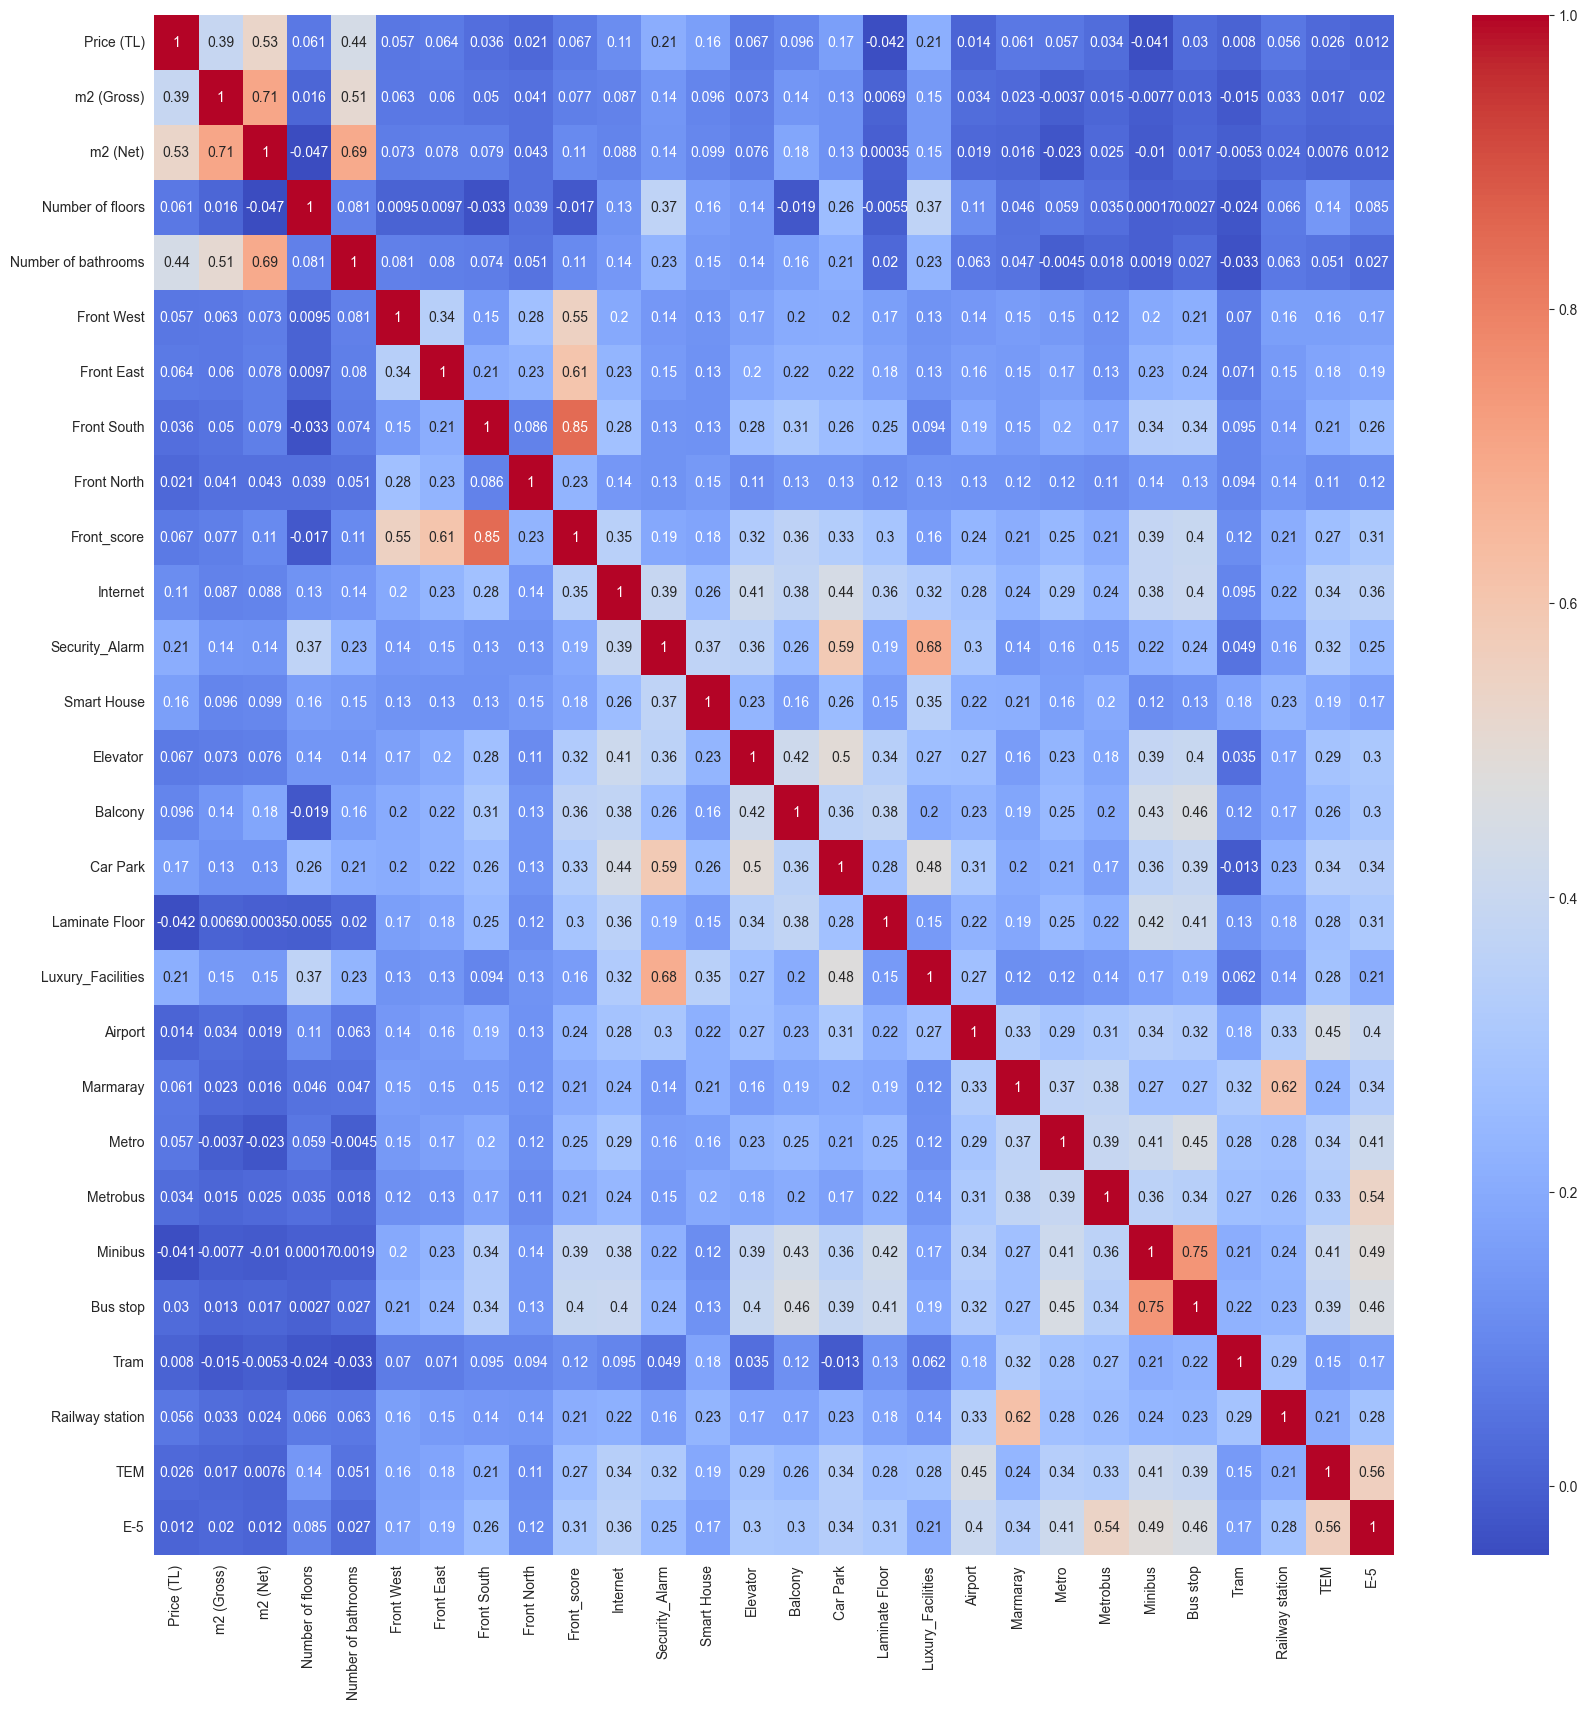

In [72]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[columns].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [73]:
"""
columns_other=["Price (TL)","Wood Joinery", "Alarm (Fire)", "Alaturka Toilet", "Aluminum joinery", "American Door", "American kitchen", "Built-in on", "Barbecue", "Household appliances", "Painted", "Dishwasher", "Refrigerator", "Wall paper", "Shower", "Parents' Bathroom", "On", "Dressing room", "Closet", "Video intercom", "Hilton Bathroom", "Intercom System", "Insulating glass", "Plasterboard", "Cellar", "Air conditioning", "Tub", "Marley", "Furniture", "Kitchen (Built-in)", "Kitchen (Laminate)", "Kitchen Natural Gas", "PVC Joinery", "Blinds", "Parquet Floor", "Ceramic Floor", "Set Top Cooker", "Spot Lighting", "Terrace", "Thermosiphon", "Cloakroom", "Wi-Fi", "Face Recognition & Fingerprint", "Washing Machine", "Washing machine", "Laundry room", "Steel door", "Water heater", "Fireplace", "Elevator.1", "Steam room", "Bath", "Booster", "Thermal Insulation", "Generator", "Cable TV", "Closed Garage", "Doorman", "Nursery", "With Private Pool", "Playground", "Sound insulation", "Siding", "Sports Area", "Water tank", "Tennis court", "Satellite", "Fire escape", "Elevator.2", "Bathroom", "Wide Corridor", "Entrance / Ramp", "Stairs", "Kitchen", "Room door", "Park", "Socket / Electric Switch", "Handle / Railing", "Toilet", "The mall", "municipality", "Mosque", "Cemevi", "Next to sea shore", "Pharmacy", "Amusement center", "Fair", "Hospital", "Synagogue", "The church", "High school", "Market", "Park.1", "Police station", "The health clinic", "District Market", "Gym", "Unirsity", "Primary School-Secondary School", "Fire Department", "Town center", "Highway", "Eurasia Tunnel", "Bosphorus Bridges", "Street", "Sea bus", "Filled", "Minibus", "Coast", "Cable car", "Tram", "Trolley bus", "Scaffolding", "Throat", "Sea", "Nature", "Lake", "Pool", "Park & ​​Green Area", "City", "Mezzanine", "Mezzanine Duplex", "Garden Duplex", "Garden Floor", "Garden", "Top floor", "Garage / Shop Top", "Entrance floor", "Floor Duplex", "Private Entry", "Rerse Duplex", "Triplex", "Ground floor", "Roof Duplex"]
"""
columns_other = ["Price (TL)", "ADSL", "Wood Joinery", "Smart House", "Alarm (Thief)", "Alarm (Fire)", "Alaturka Toilet", "Aluminum joinery", "American Door", "American kitchen", "Built-in on", "Elevator", "Barbecue", "Household appliances", "Painted", "Dishwasher", "Refrigerator", "Wall paper", "Shower", "Parents' Bathroom", "Fiber Internet", "On", "Dressing room", "Closet", "Video intercom", "Hilton Bathroom", "Intercom System", "Insulating glass", "Jacuzzi", "Plasterboard", "Cellar", "Air conditioning", "Tub", "Laminate Floor", "Marley", "Furniture", "Kitchen (Built-in)", "Kitchen (Laminate)", "Kitchen Natural Gas", "PVC Joinery", "Blinds", "Parquet Floor", "Ceramic Floor", "Set Top Cooker", "Spot Lighting", "Terrace", "Thermosiphon", "Cloakroom", "Wi-Fi", "Face Recognition & Fingerprint", "Washing Machine", "Washing machine", "Laundry room", "Steel door", "Water heater", "Fireplace", "Elevator.1", "Steam room", "Security", "Bath", "Booster", "Thermal Insulation", "Generator", "Cable TV", "Closed Garage", "Doorman", "Nursery", "With Private Pool", "Car park", "Playground", "Sauna", "Sound insulation", "Siding", "Sports Area", "Water tank", "Tennis court", "Satellite", "Fire escape", "Swimming Pool (Open)", "Swimming Pool (Indoor)", "Parking Lot", "Elevator.2", "Bathroom", "Wide Corridor", "Entrance / Ramp", "Stairs", "Kitchen", "Room door", "Park", "Socket / Electric Switch", "Handle / Railing", "Toilet", "Swimming pool", "The mall", "municipality", "Mosque", "Cemevi", "Next to sea shore", "Pharmacy", "Amusement center", "Fair", "Hospital", "Synagogue", "The church", "High school", "Market", "Park.1", "Police station", "The health clinic", "District Market", "Gym", "Unirsity", "Primary School-Secondary School", "Fire Department", "Town center", "Highway", "Eurasia Tunnel", "Bosphorus Bridges", "Street", "Sea bus", "Filled", "E-5", "Airport", "Marmaray", "Metro", "Metrobus", "Minibus", "Bus stop", "Coast", "TEM", "Cable car", "Tram", "Railway station", "Trolley bus", "Scaffolding", "Throat", "Sea", "Nature", "Lake", "Pool", "Park & ​​Green Area", "City", "Mezzanine", "Mezzanine Duplex", "Garden Duplex", "Garden Floor", "Garden", "Top floor", "Garage / Shop Top", "Entrance floor", "Floor Duplex", "Private Entry", "Rerse Duplex", "Triplex", "Ground floor", "Roof Duplex"]


In [74]:
pd.set_option('display.max_rows', None)

corr_with_price = data[columns_other].corr(numeric_only=True)["Price (TL)"].sort_values(ascending=False)
print(corr_with_price)

Price (TL)                         1.000000
Air conditioning                   0.289447
Throat                             0.288123
Dressing room                      0.283747
Parents' Bathroom                  0.279137
Dishwasher                         0.253663
Laundry room                       0.245857
Household appliances               0.244050
Generator                          0.234620
Closet                             0.230500
Blinds                             0.228249
Sea                                0.212714
Refrigerator                       0.211032
Swimming Pool (Open)               0.204307
Closed Garage                      0.201455
Security                           0.198143
Built-in on                        0.197627
On                                 0.187916
Kitchen (Built-in)                 0.182946
Cloakroom                          0.179499
Doorman                            0.177466
Fireplace                          0.173941
Water tank                      

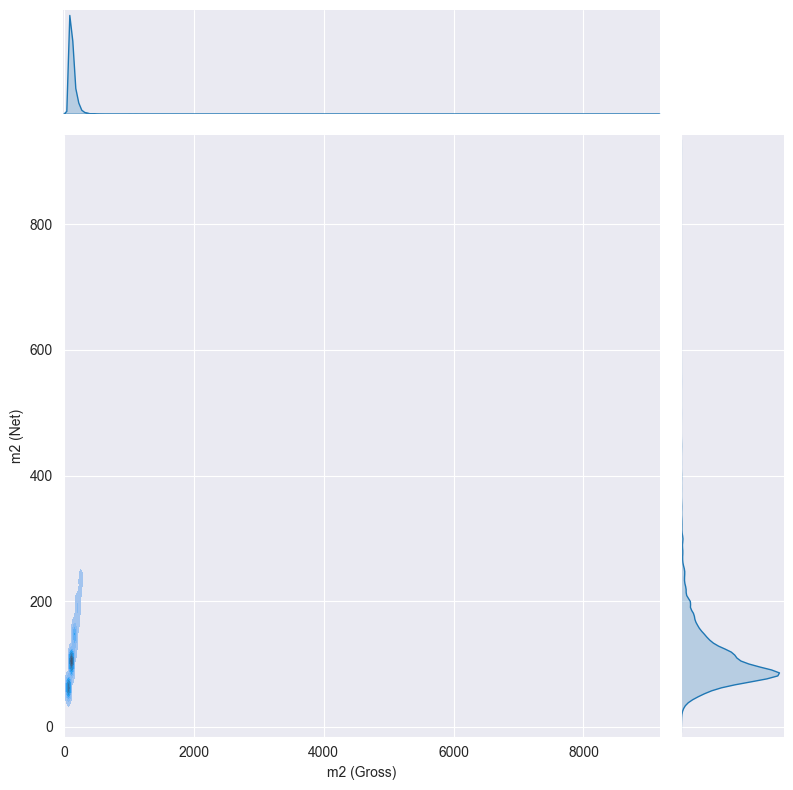

In [75]:
sns.jointplot(
    data=data,
    x="m2 (Gross)",
    y="m2 (Net)",
    kind="kde",
    fill=True,
    height=8
)
plt.show()


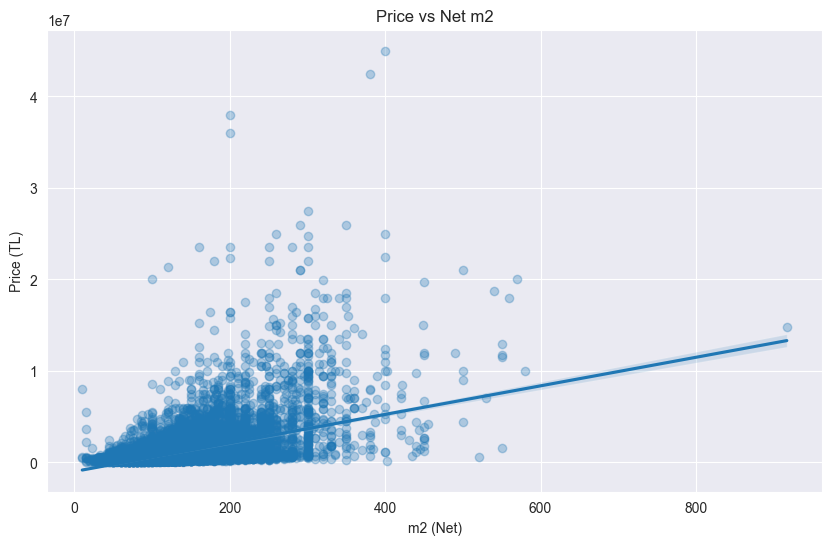

In [76]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=data,
    x="m2 (Net)",
    y="Price (TL)",
    scatter_kws={"alpha":0.3}
)
plt.title("Price vs Net m2")
plt.show()


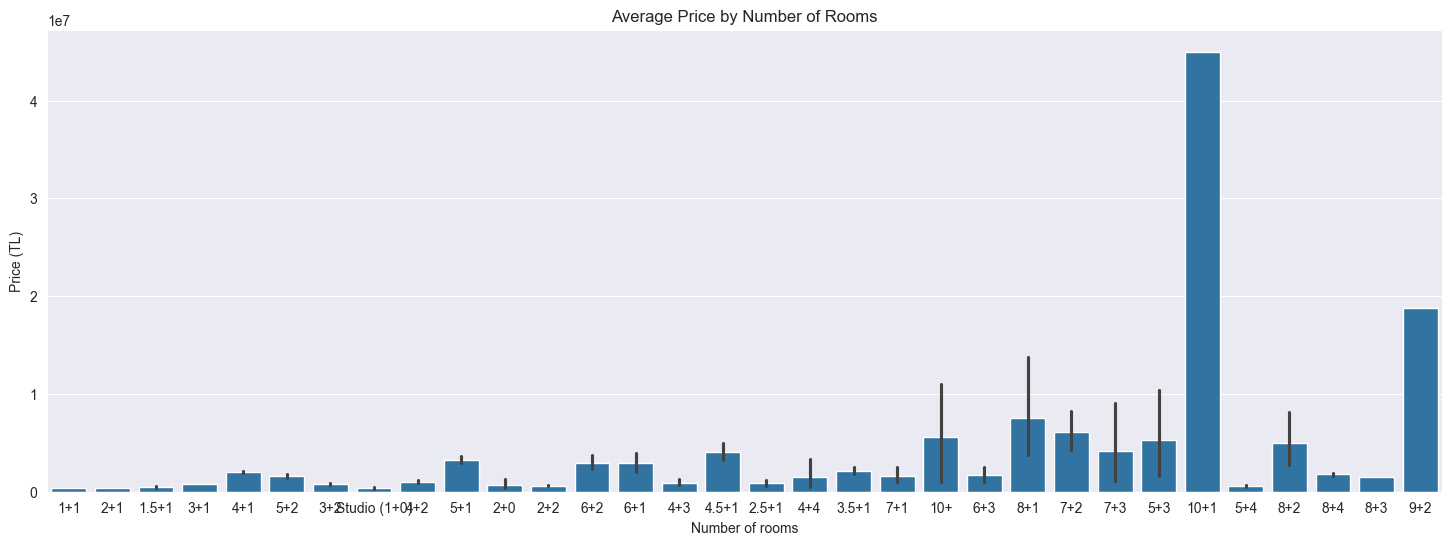

In [77]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=data,
    x="Number of rooms",
    y="Price (TL)",
    estimator="mean"
)
plt.title("Average Price by Number of Rooms")
plt.show()


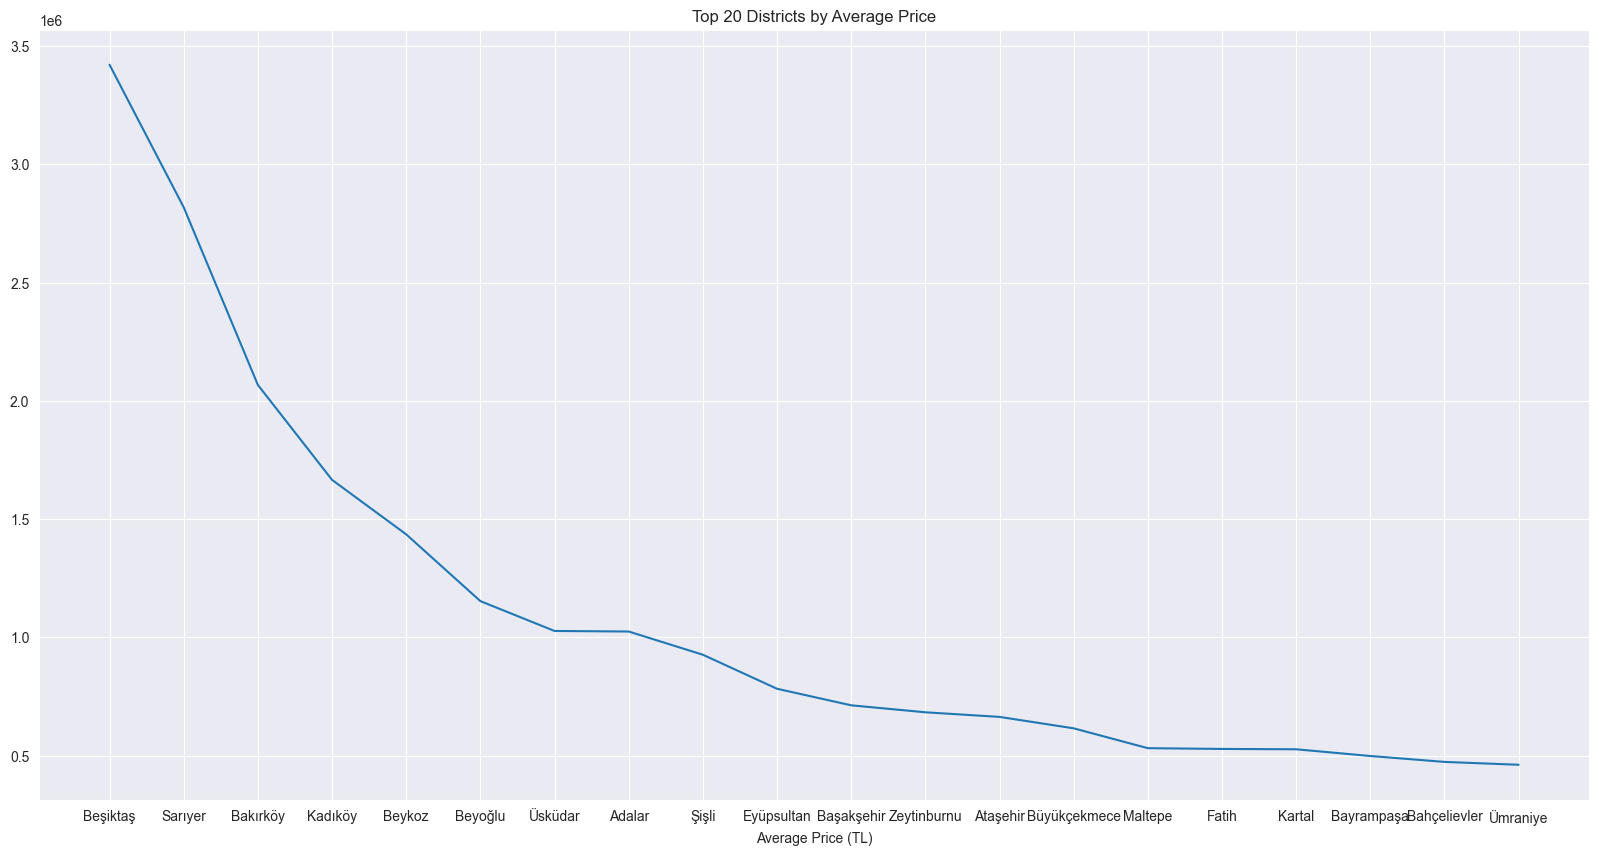

In [78]:
plt.figure(figsize=(20,10))
top20 = data.groupby("District")["Price (TL)"].mean().sort_values(ascending=False).head(20)
sns.lineplot(x=top20.index, y=top20.values)
plt.title("Top 20 Districts by Average Price")
plt.xlabel("Average Price (TL)")
plt.show()

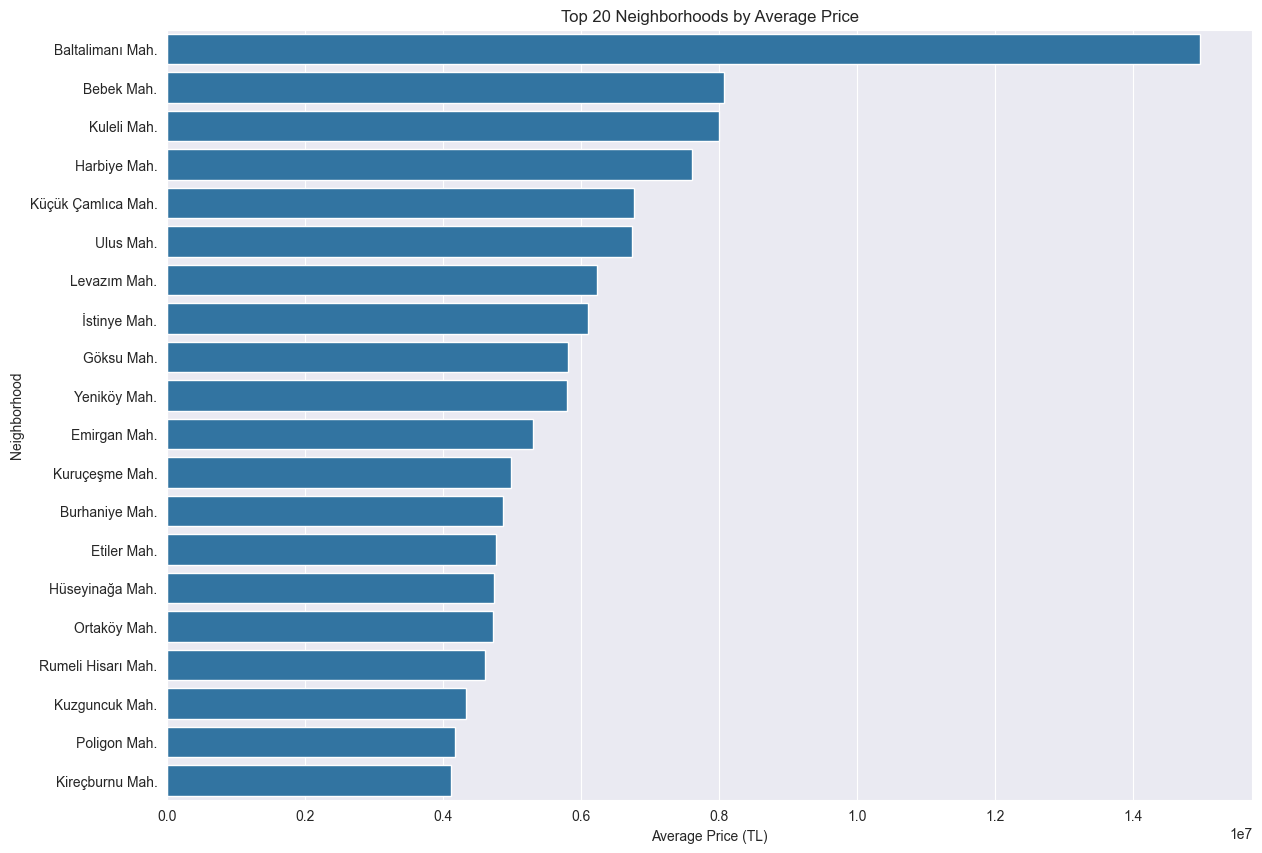

In [79]:
plt.figure(figsize=(14,10))
top20 = data.groupby("Neighborhood")["Price (TL)"].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top20.values, y=top20.index)
plt.title("Top 20 Neighborhoods by Average Price")
plt.xlabel("Average Price (TL)")
plt.show()

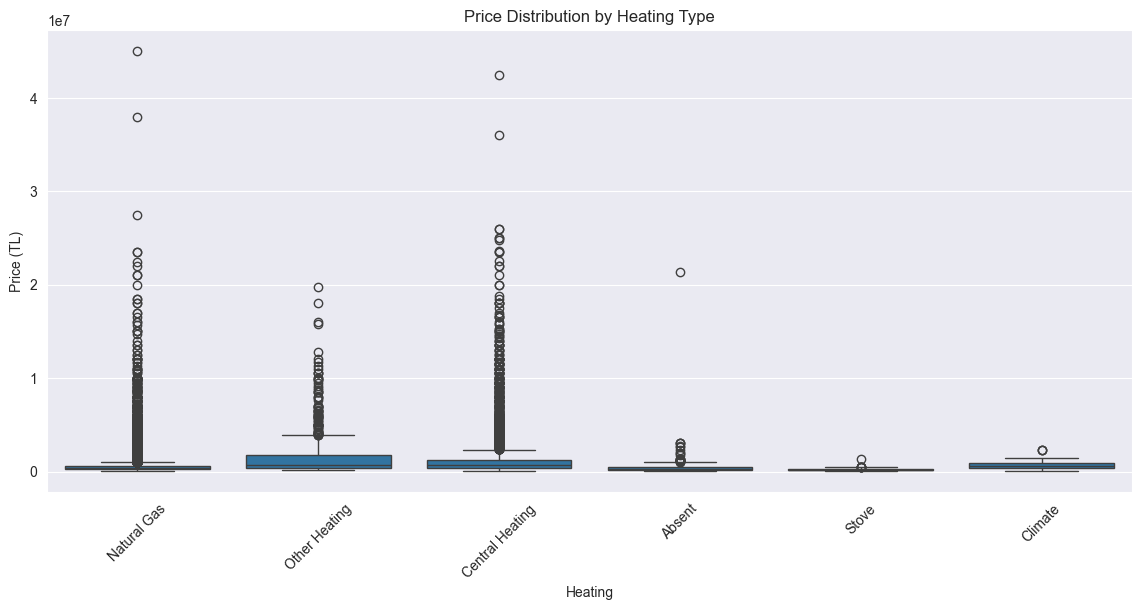

In [80]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x="Heating", y="Price (TL)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Heating Type")
plt.show()

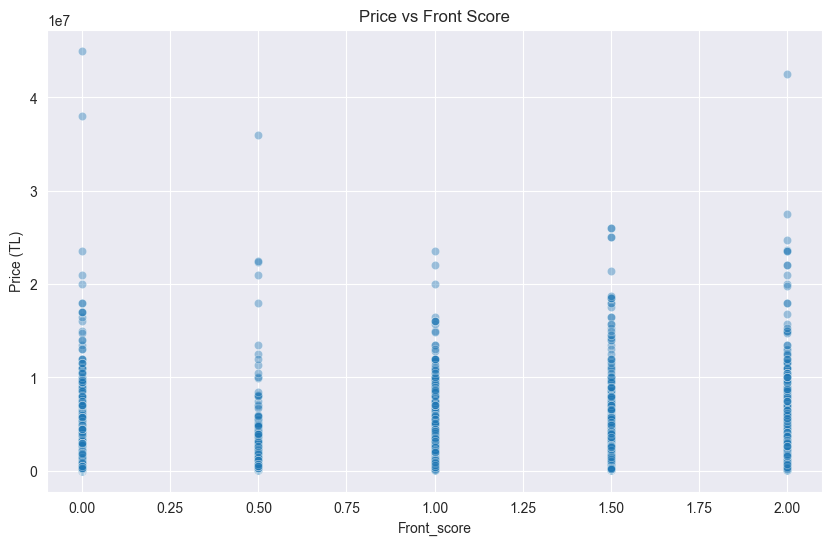

In [81]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x="Front_score",
    y="Price (TL)",
    alpha=0.4
)
plt.title("Price vs Front Score")
plt.show()


Price (TL)    617
dtype: int64


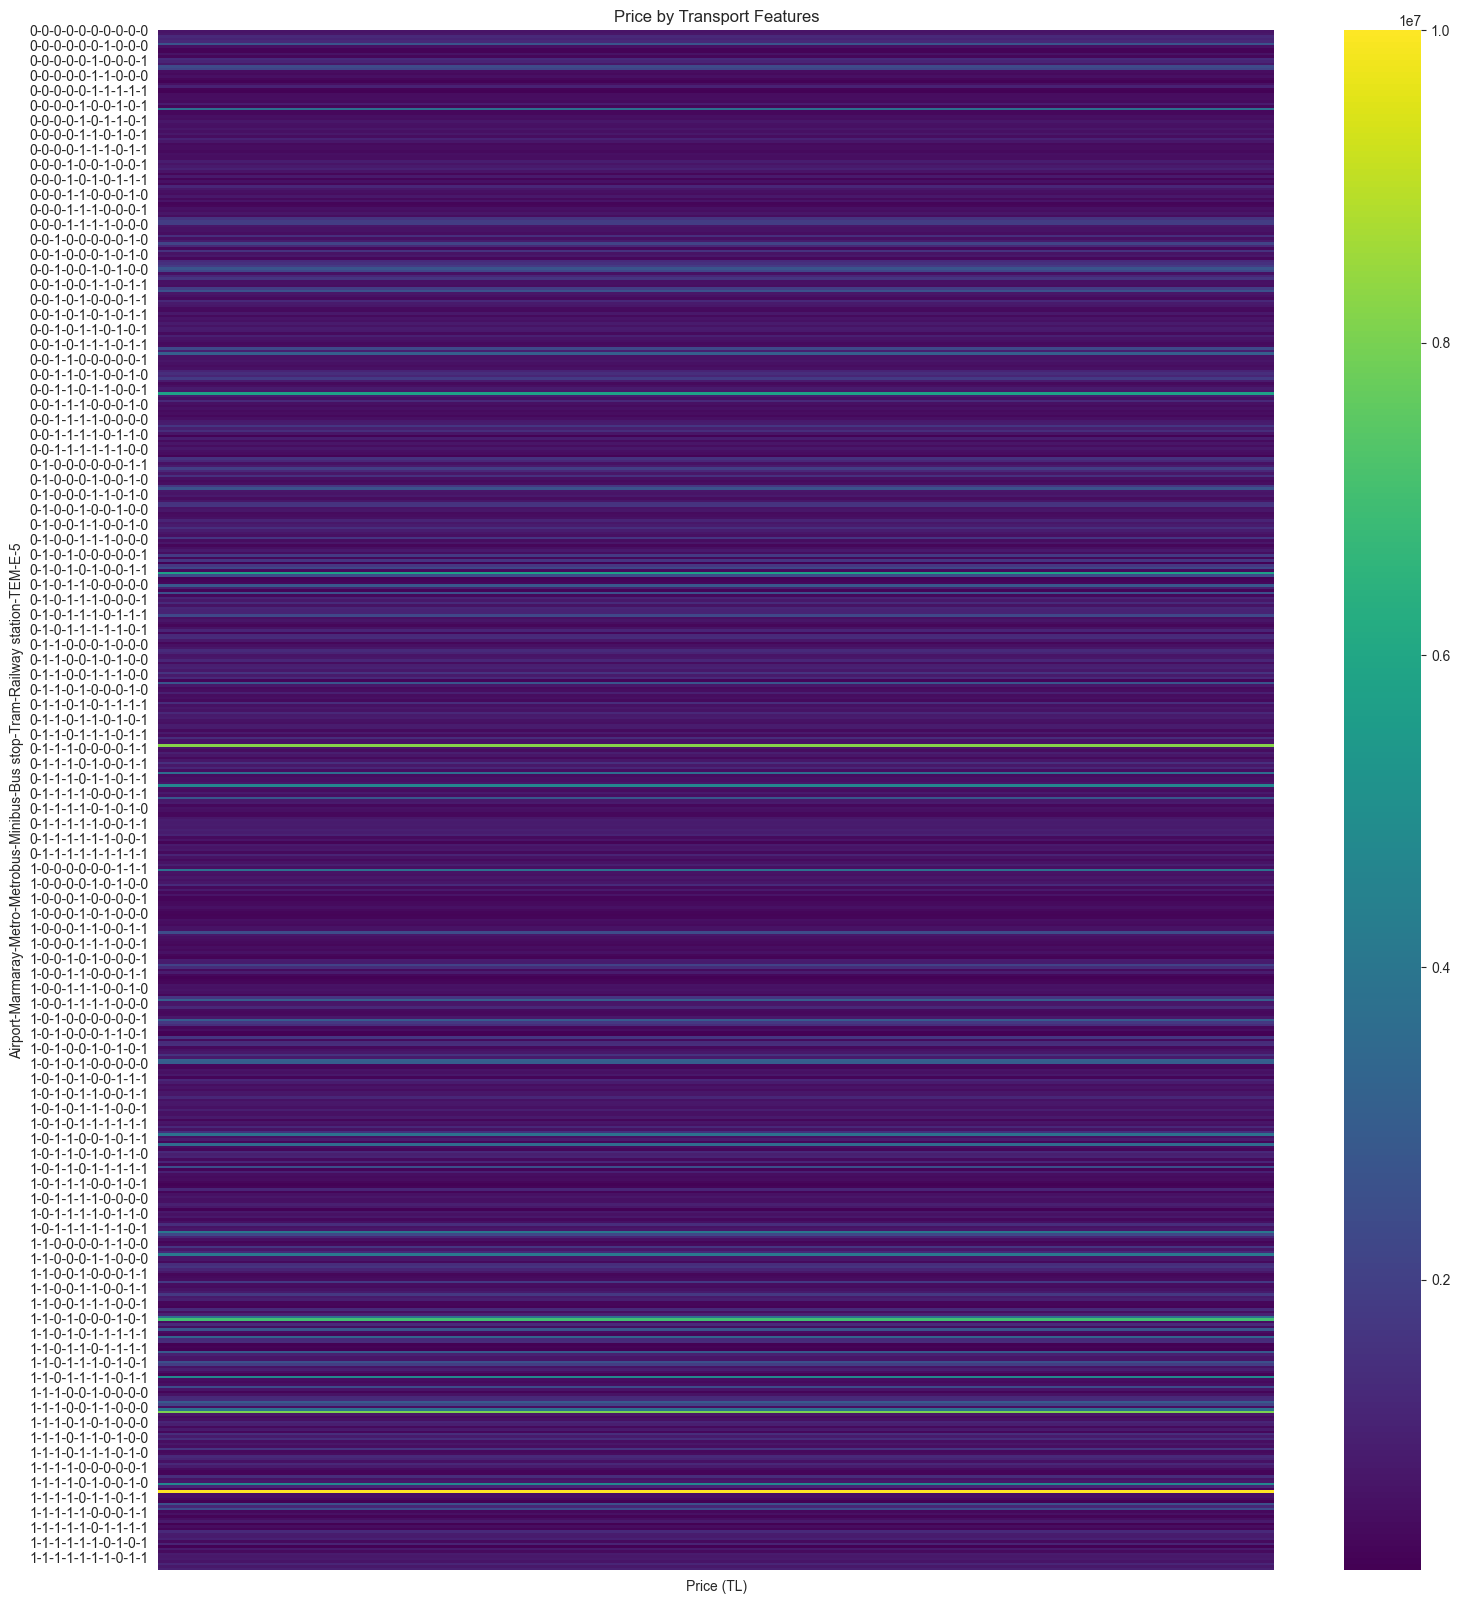

In [82]:
transport_cols = ["Airport","Marmaray","Metro","Metrobus","Minibus","Bus stop","Tram","Railway station","TEM","E-5"]

transport_means = data[transport_cols + ["Price (TL)"]].groupby([col for col in transport_cols]).mean()
print(transport_means.count())
plt.figure(figsize=(18,20))
sns.heatmap(transport_means, annot=False, cmap="viridis")
plt.title("Price by Transport Features")
plt.show()


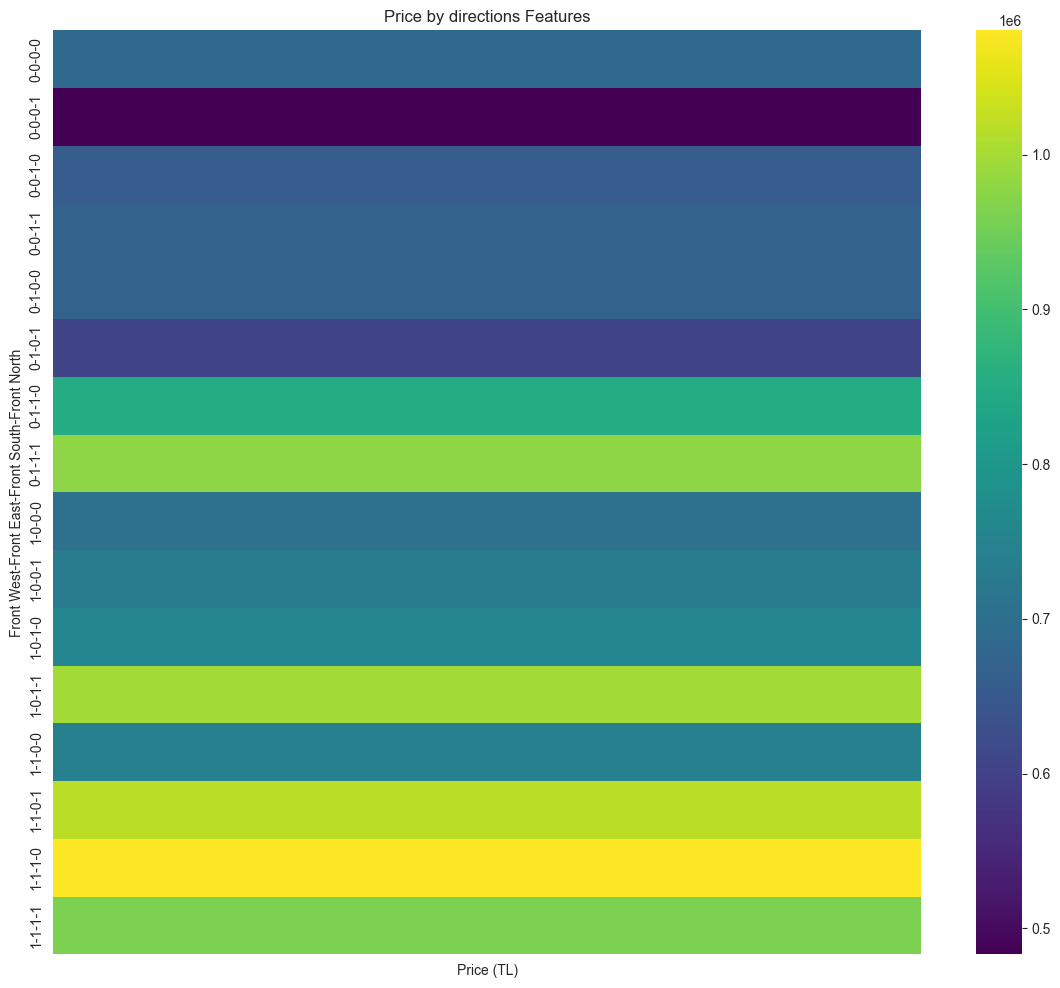

In [83]:
directions_cols = ['Front West', 'Front East', 'Front South', 'Front North']

directions_means = data[directions_cols + ["Price (TL)"]].groupby([col for col in directions_cols]).mean()

plt.figure(figsize=(14,12))
sns.heatmap(directions_means, annot=False, cmap="viridis")
plt.title("Price by directions Features")
plt.show()

In [84]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame=data,
    x="m2 (Gross)",
    y="m2 (Net)",
    z="Price (TL)",
    color="Number of rooms",
    opacity=0.6
)
fig.show()


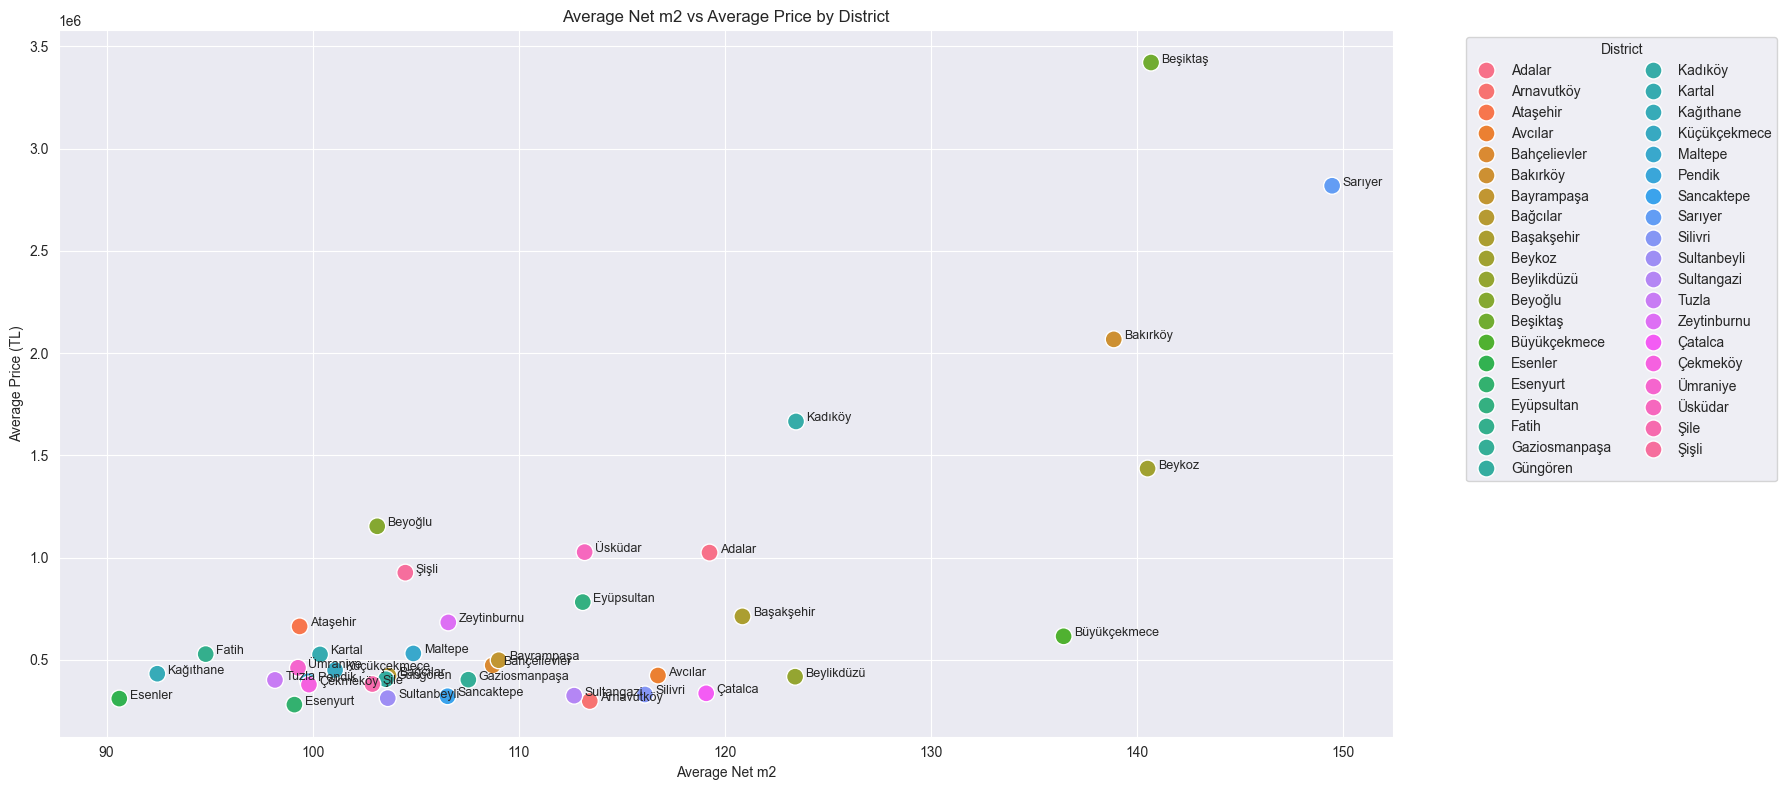

In [85]:
df_grouped = data.groupby("District").agg({
    "m2 (Net)": "mean",
    "Price (TL)": "mean"
}).reset_index()

plt.figure(figsize=(18, 8))
ax = sns.scatterplot(
    x=df_grouped["m2 (Net)"],
    y=df_grouped["Price (TL)"],
    hue=df_grouped["District"],
    s=150
)

# Add the district name as a label next to each data point
for i in range(len(df_grouped)):
    ax.text(
        df_grouped["m2 (Net)"].iloc[i] + 0.5,
        df_grouped["Price (TL)"].iloc[i] + 0.5,
        df_grouped["District"].iloc[i],
        fontsize=9
    )

plt.xlabel("Average Net m2")
plt.ylabel("Average Price (TL)")
plt.title("Average Net m2 vs Average Price by District")

plt.legend(title="District", bbox_to_anchor=(1.05, 1), ncol=2, frameon=True)
plt.tight_layout()
plt.show()
